# Final Project Data Preparation 

In [2]:
#import mypytable 
from mypytable import MyPyTable 
import dataPrepUtils as dputils
import importlib

## For Salaries Dataset, Calculate Average Career Salary for each Player


## Load Dataset from file

In [3]:
#load data from file 
salaries = MyPyTable()
salaries.load_from_file("salaries_1985to2018.csv")

## Calculate Average Yearly Salary for each Player in the Dataset

In [4]:
# convert data to numeric
salaries.convert_to_numeric()

#get averages 
avg_header, avg_salaries = dputils.calculate_avg_salaries(salaries.data)

## Write avg Salaries to a new File 

In [5]:
#new pytable instance
avg_salaries_table = MyPyTable(avg_header, avg_salaries)

#write to new file 
avg_salaries_table.save_to_file("avg-player-salaries.txt")


## Load Player Data from File

In [6]:
players = MyPyTable()
players.load_from_file("players.csv")

## Perform Inner Join on Players and Average Salaries 

In [7]:
avg_players = players.perform_inner_join(avg_salaries_table, ["id"])


## Clean Data by Removing Instances with Missing Values 


In [8]:
avg_players.remove_rows_with_missing_values()

## Remove Players who Played Less than 164 Career Games and Were Drafted Before the year 2000

In [9]:
updated_players = dputils.remove_players(avg_players.data, avg_players.column_names)
avg_players.data = updated_players

## Write Updated Player List to File

In [10]:
avg_players.save_to_file("cleaned-data.txt")

## Find Discretization Ranges for Salaries

[70000.0, 1609676.1, 3149352.2, 4689028.3, 6228704.4, 7768380.5, 9308056.6, 10847732.7, 12387408.8, 13927084.9, 15466761.0]



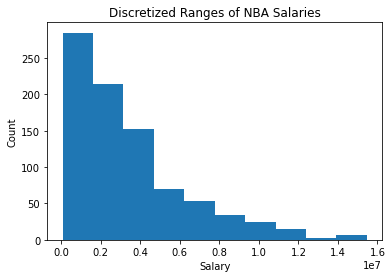

In [11]:
importlib.reload(dputils)

#get_column for salaries
avg_players.convert_to_numeric()
salaries = avg_players.get_column("avg_salary")

#get bins for salaries
salary_cutoffs = dputils.compute_equal_width_cutoffs(salaries, 10)
salary_freq = dputils.compute_bin_frequencies(salaries, salary_cutoffs)
print(salary_cutoffs)

#histogram for salaries
print()
dputils.generate_histogram(salaries, "Discretized Ranges of NBA Salaries", "Salary", "Count")


# Discretized Range for Salaries (Millions of US Dollars)
1. < 1.61
2. 1.61 - 3.15
3. 3.15 - 4.69
4. 4.69 - 6.22
5. 6.23 - 7.77
6. 7.77 - 9.31
7. 9.31 - 10.85
8. 10.85 - 12.39
9. 12.38 - 13.93
10. 13.93 <